In [17]:
from microsim import schema as ms
import matplotlib.pyplot as plt

custom_cache_settings = ms.settings.CacheSettings(
    read=False,
    write=False,
)

sim = ms.Simulation(
    truth_space=ms.ShapeScaleSpace(shape=(1, 1004, 1004), scale=(0.02, 0.02, 0.02)),
    output_space={"downscale": (1, 4, 4)},
    sample=ms.Sample(
        labels=[
            ms.FluorophoreDistribution(
                distribution=ms.BioSR(root_dir="/group/jug/federico/careamics_training/data/BioSR", label="Microtubules"),
                fluorophore="EGFP",
            )
        ]
    ),
    modality=ms.Confocal(pinhole_au=0.5),
    settings=ms.Settings(random_seed=100, max_psf_radius_aus=8, cache=custom_cache_settings),
    detector=ms.CameraCCD(qe=0.2, read_noise=2, bit_depth=12),
)

In [18]:
print(sim.sample.labels[0].distribution)

root_dir='/group/jug/federico/careamics_training/data/BioSR' label='Microtubules' idx=None


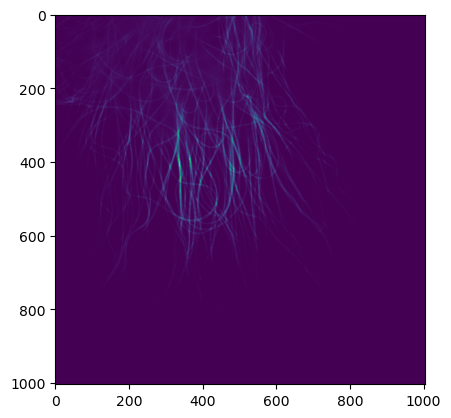

In [19]:
ground_truth = sim.ground_truth()
plt.imshow(ground_truth[0, 0, ...])

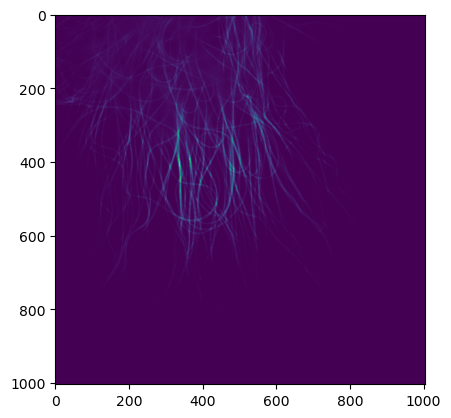

In [20]:
emission_flux = sim.emission_flux(ground_truth)
plt.imshow(emission_flux[0, 0, 0, 0, ...])

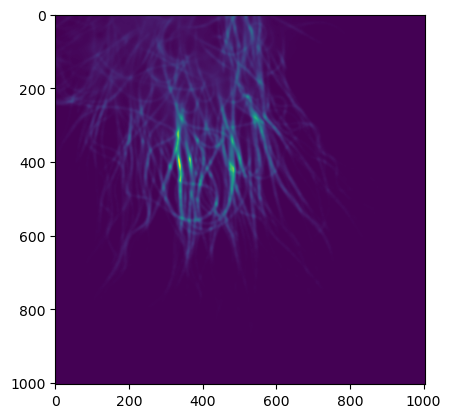

In [21]:
optical_img = sim.optical_image(emission_flux)
plt.imshow(optical_img[0, 0, ...])

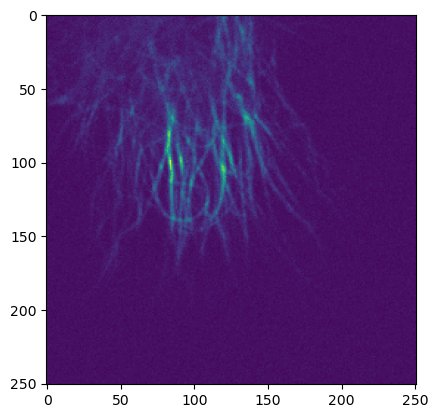

In [22]:
realistic_digital_image = sim.digital_image(optical_img, with_detector_noise=True)
plt.imshow(realistic_digital_image[0, 0, ...])